In [118]:
# The data-set aims to answer the following key questions:

    # Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
    # Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
    # How does Infant and Adult mortality rates affect life expectancy?
    # Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
    # What is the impact of schooling on the lifespan of humans?
    # Does Life Expectancy have positive or negative relationship with drinking alcohol?
    # Do densely populated countries tend to have lower life expectancy?
    # What is the impact of Immunization coverage on life Expectancy?


# Import Library

In [119]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [120]:
p_profile = 'https://raw.githubusercontent.com/notfakearcher/yanjun/main/02_data/Life_Expectancy_Data.csv'


In [121]:
life = pd.read_csv(p_profile, header = 14)
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [122]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [123]:
# delete some rows which dont have any data in life expectancy
life = life.dropna(axis = 0, subset = ['Life expectancy '] )
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [124]:
life1 = life.copy()
life1 = life1.dropna()
life1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [125]:
cond = life1.columns != 'Life expectancy '
life2 = life1.loc[:,cond]
life2

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: xlabel='Country', ylabel='Life expectancy '>

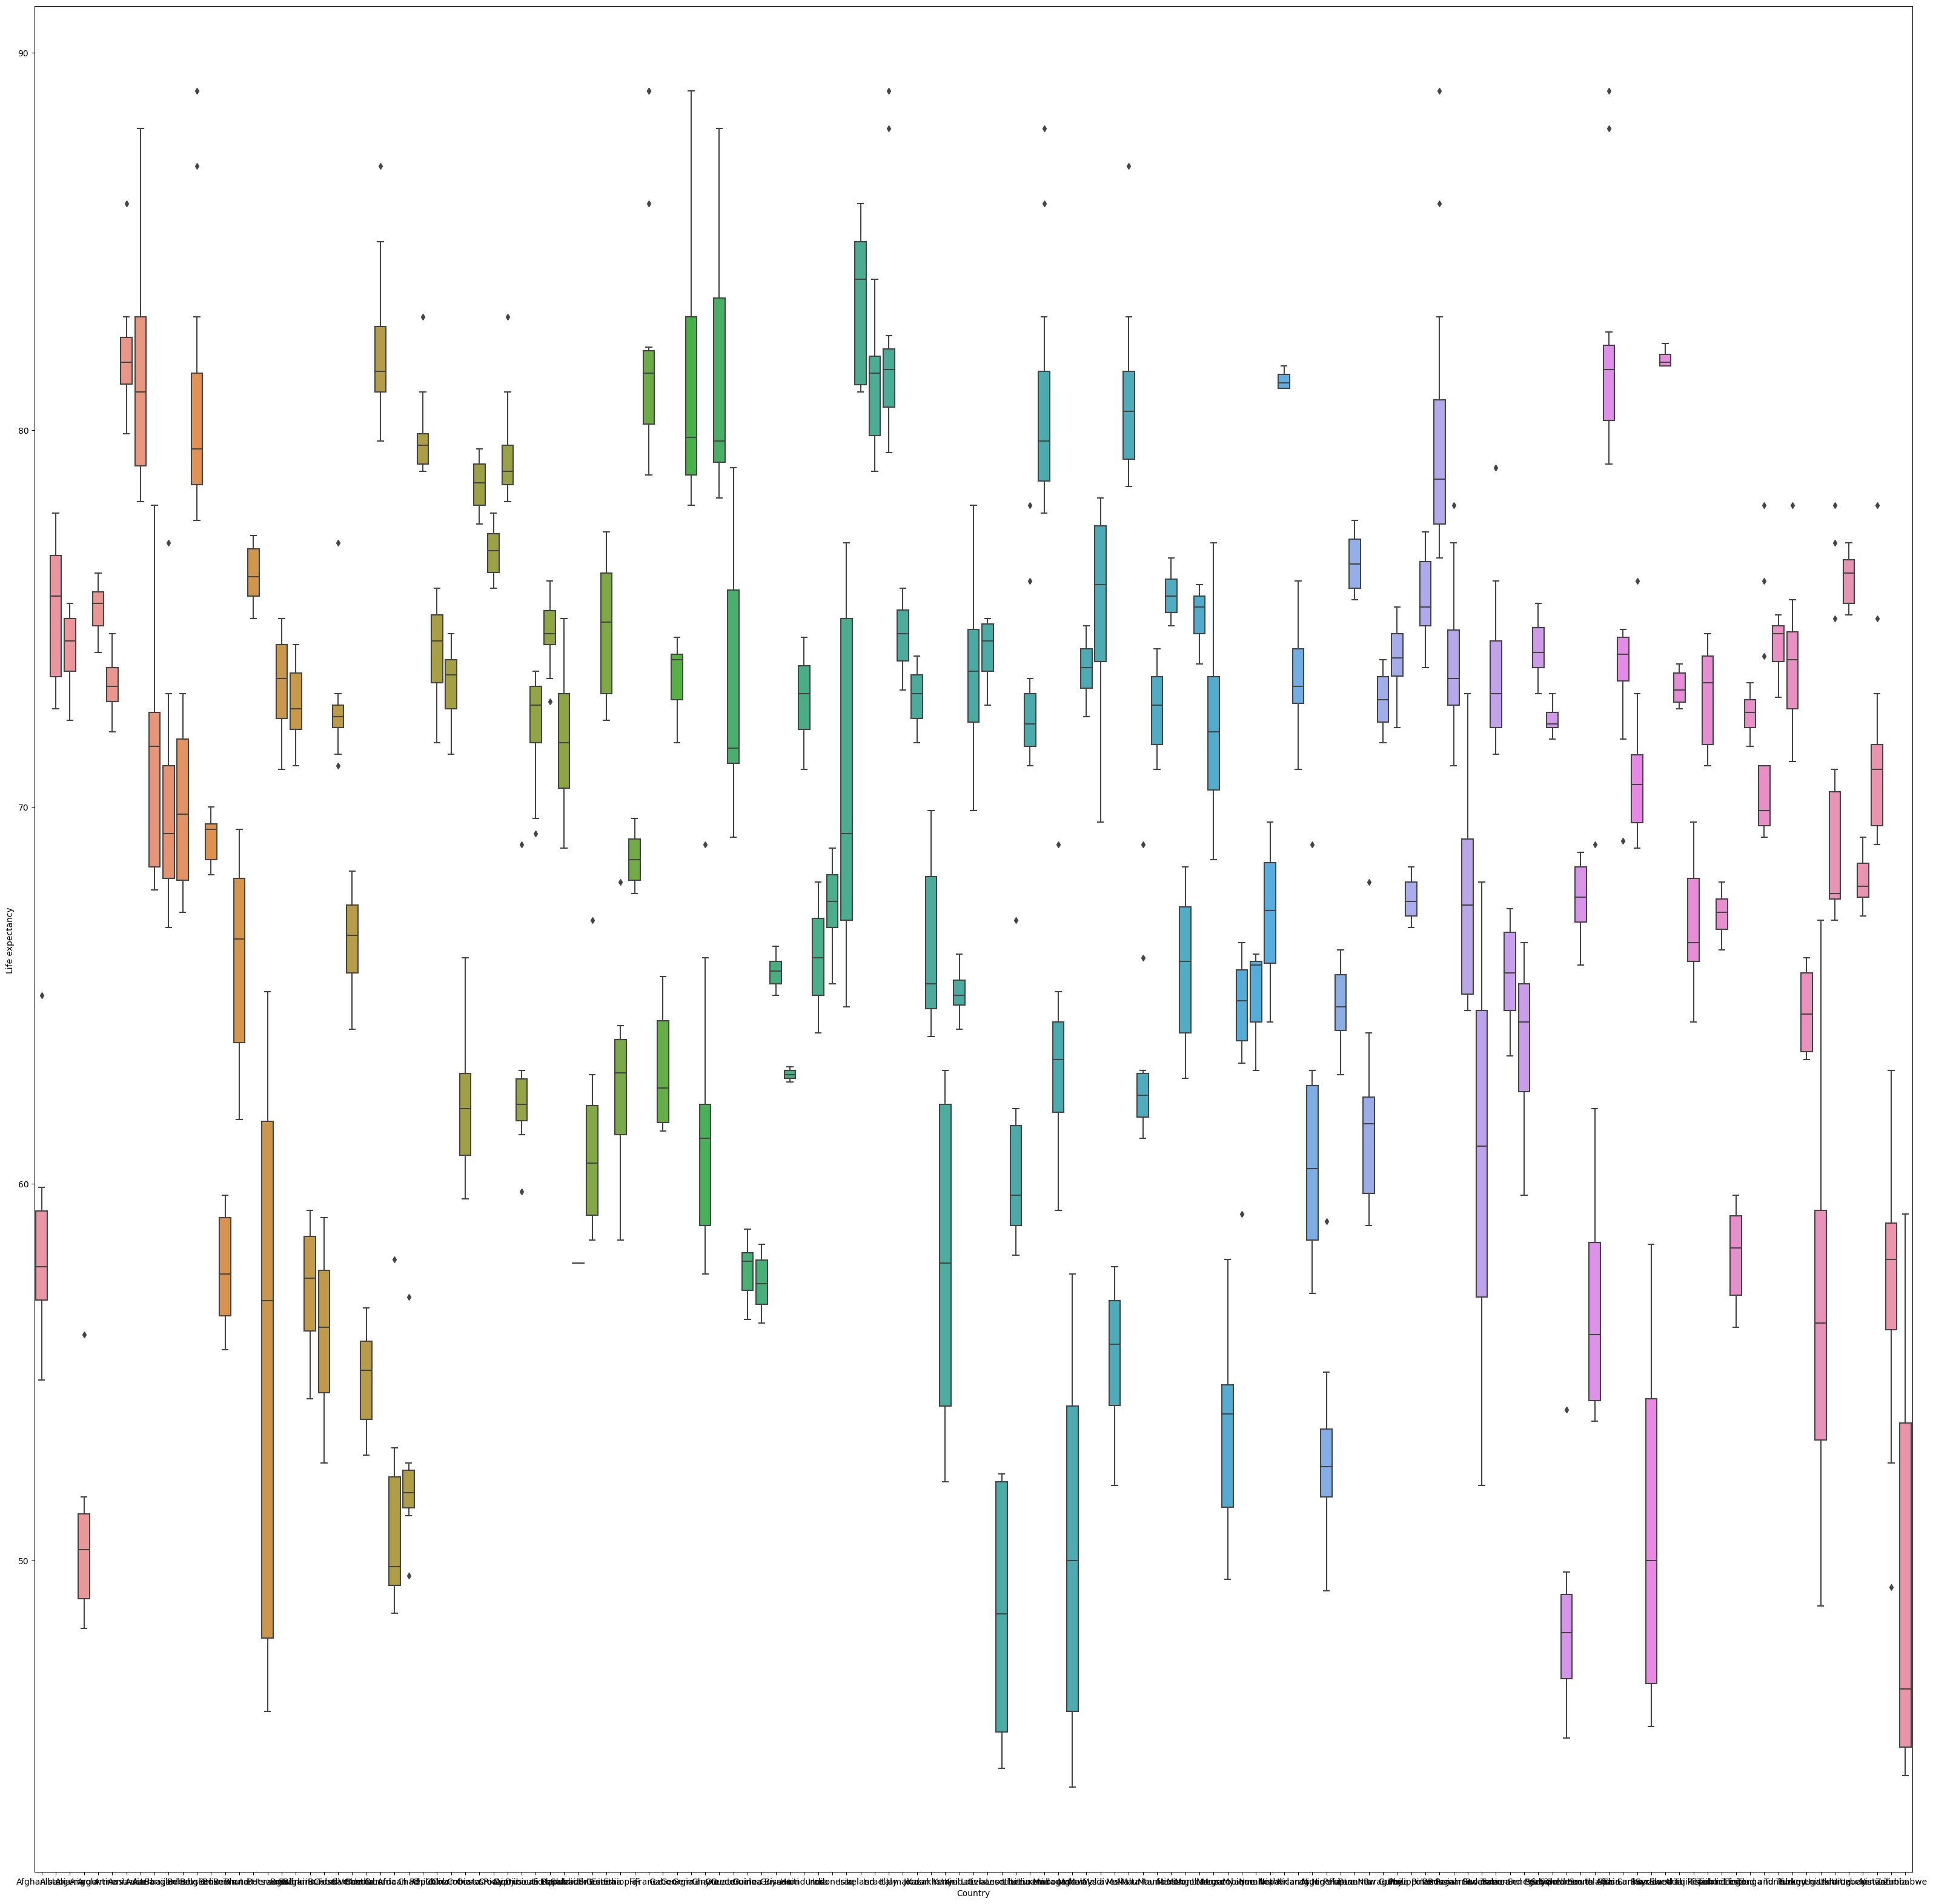

In [126]:
x = 'Country'
y = 'Life expectancy '
fig, ax = plt.subplots(figsize = (40,40))
sns.boxplot(data = life1, x = x, y = y)

In [127]:
# sns.histplot(x = y)
# plt.plot()
# plt.title('Histogram of Mean Life Expectancy across Countries')

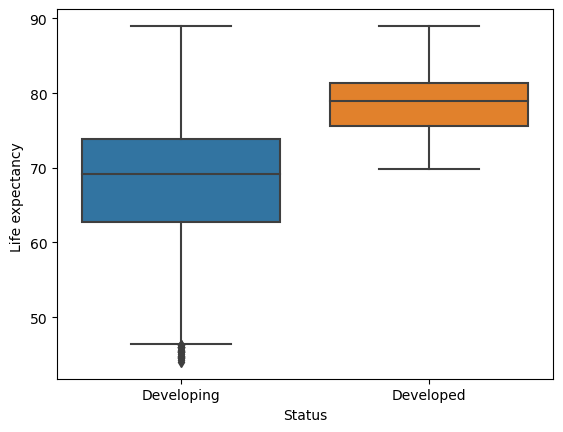

In [128]:
# group according to country status 
p = sns.boxplot(data = life1, x = 'Status', y = 'Life expectancy ')

# every country mean life expectancy boxplot

In [129]:
y = life1['Life expectancy ']

# Visual

In [130]:
pic = 'https://github.com/notfakearcher/yanjun/tree/main/03_visuals'
# for i in life1.columns:

  

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

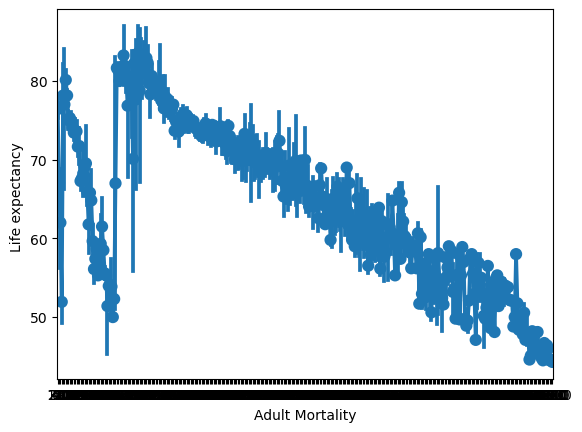

In [131]:
# sns.scatterplot(data = life1, x = 'Adult Mortality', y = 'Life expectancy ')
sns.pointplot(data = life1, x = 'Adult Mortality', y = 'Life expectancy ')

<Axes: xlabel='infant deaths', ylabel='Life expectancy '>

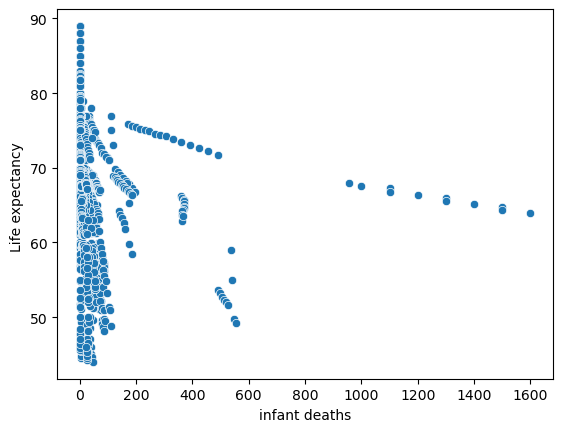

In [132]:
sns.scatterplot(life1, x = 'infant deaths', y ='Life expectancy ')

<Axes: xlabel='Alcohol', ylabel='Life expectancy '>

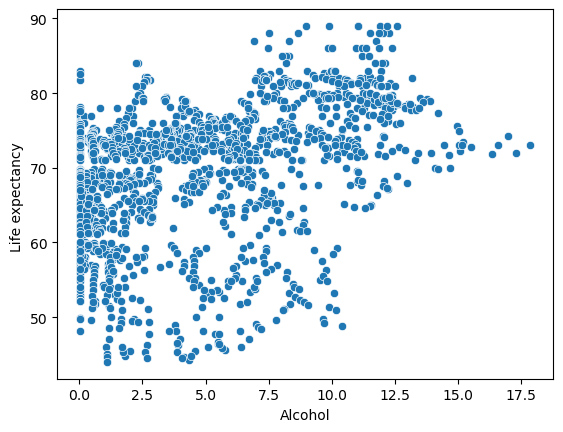

In [133]:
sns.scatterplot(x = life1.iloc[:,6], y = life1.iloc[:, 3] )

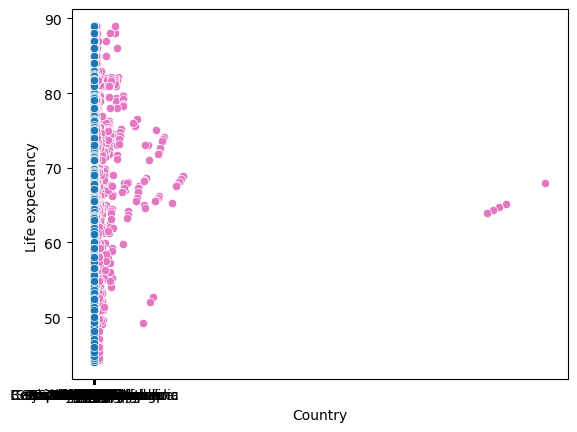

In [134]:
for i in life2.columns:
  sns.scatterplot(data = life2, x = i, y = y)


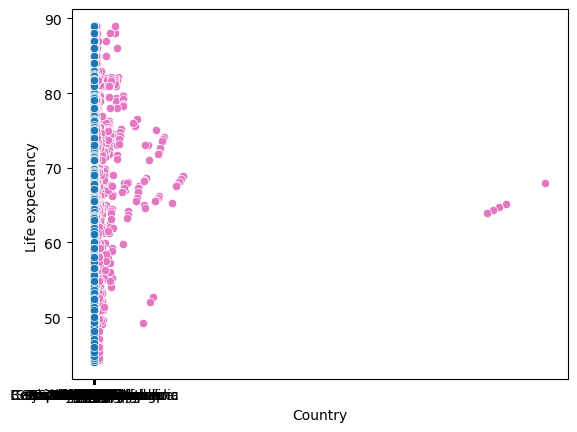

In [135]:
for i in range(len(life2.columns)):
  sns.scatterplot(x = life2.iloc[:, i], y = y)

<Axes: xlabel='Country', ylabel='Life expectancy '>

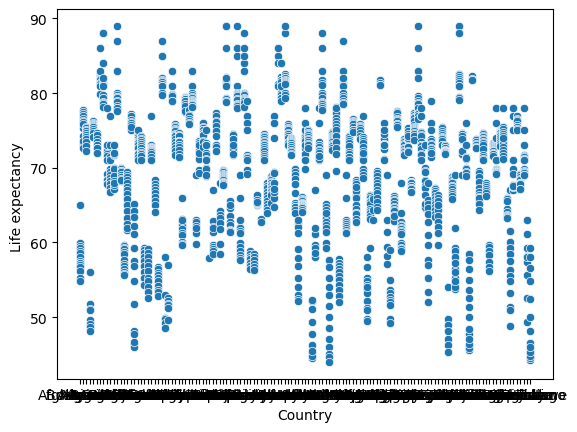

In [136]:
sns.scatterplot(x = life2.iloc[:,0], y = y)

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

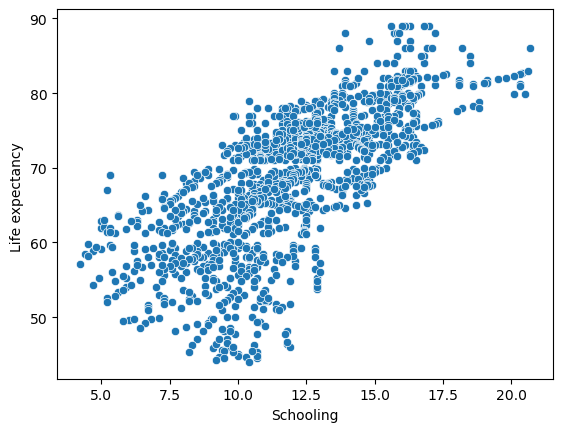

In [137]:
sns.scatterplot(x = life2.iloc[:,20],y = y)

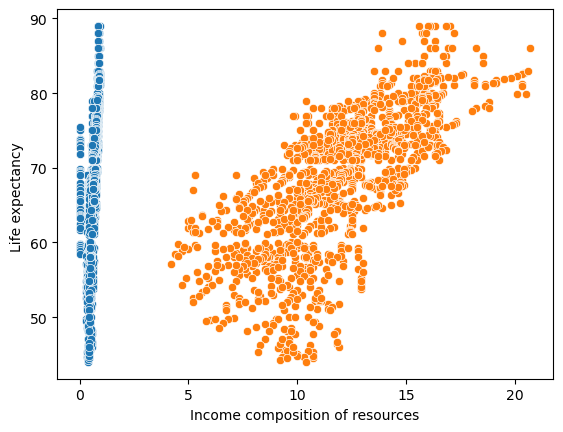

In [162]:
sns.scatterplot(x = life2.iloc[:,19],y = y)
sns.scatterplot(x = life2.iloc[:,20],y = y)
plt.show()

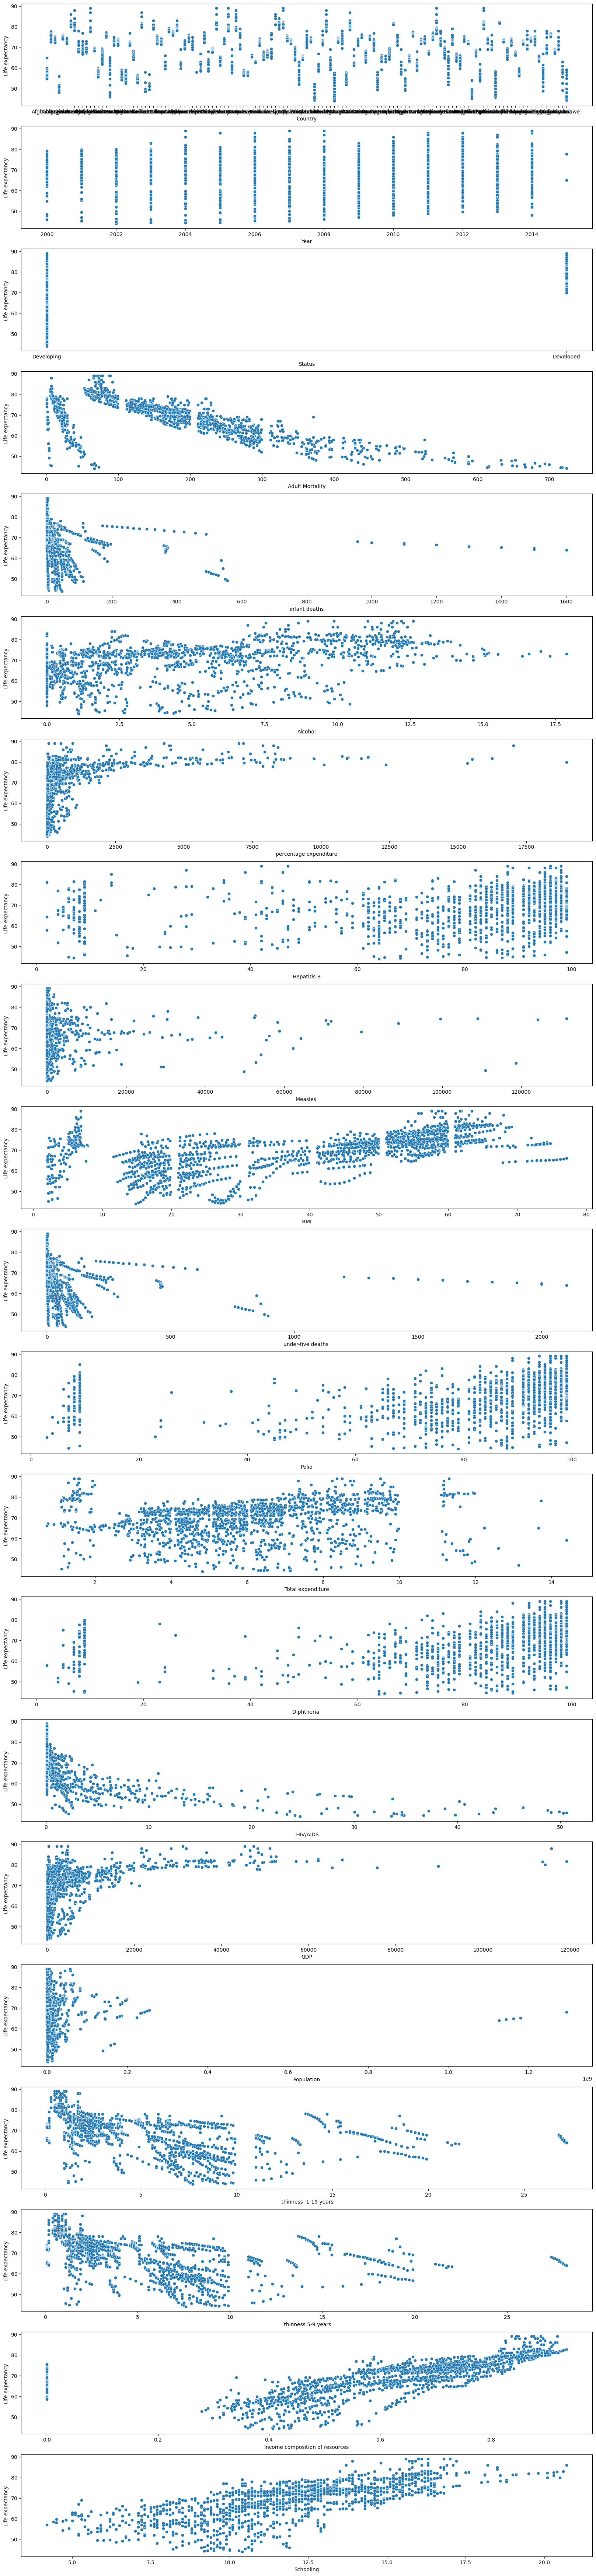

In [161]:
fig, ax = plt.subplots(21,1,figsize = (20,90))
ax = np.ravel(ax)
for i in range(len(life2.columns)):
  sns.scatterplot(x = life2.iloc[:, i], y = y, ax = ax[i])
plt.show()